# MLFlow com Naive Bayes

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
import matplotlib.pyplot as plt

import mlflow
import mlflow.sklearn

In [3]:
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [4]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


## Transformações e Separação das Variáveis

In [5]:
for col in credito.columns:
    if credito[col].dtype == 'object':
        credito[col] = credito[col].astype('category').cat.codes

In [6]:
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:,20].values

In [7]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state=42)

## Treinamento do Modelo

2025/02/04 10:51:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo: 8003783068b9416ebeddcd56a0515d04


<function mlflow.tracking.fluent.end_run(status: str = 'FINISHED') -> None>

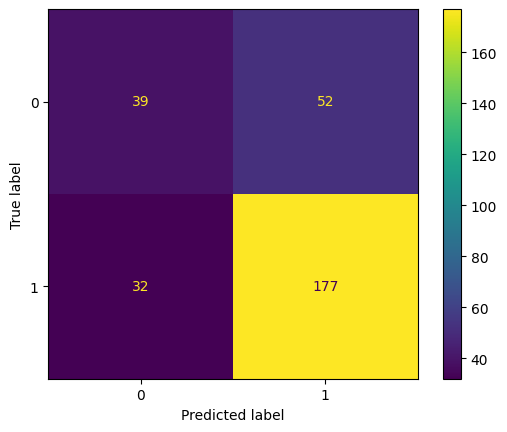

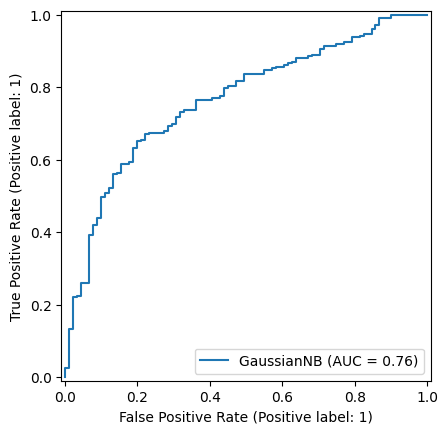

In [15]:
# Treinando o modelo com experimento MLFlow
mlflow.set_experiment("nbexperimento")

with mlflow.start_run():
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_treinamento, y_treinamento)
    previsoes = naive_bayes.predict(X_teste)

    # Métricas
    acuracia = accuracy_score(y_teste, previsoes)
    recall = recall_score(y_teste, previsoes)
    precision = precision_score(y_teste, previsoes)
    f1 = f1_score(y_teste, previsoes)
    auc= roc_auc_score(y_teste, previsoes)
    log = log_loss(y_teste, previsoes)

    # Registrar Métricas
    mlflow.log_metric("acuracia", acuracia)
    mlflow.log_metric("recall",recall)
    mlflow.log_metric("precision",precision)
    mlflow.log_metric("f1",f1)
    mlflow.log_metric("auc",auc)
    mlflow.log_metric("log",log)

    # Gráficos
    confusion = ConfusionMatrixDisplay.from_estimator(naive_bayes, X_teste, y_teste)
    plt.savefig("confusionmatrix.png")
    roc = RocCurveDisplay.from_estimator(naive_bayes, X_teste, y_teste)
    plt.savefig("roc.png")

    # Logar Gráficos
    mlflow.log_artifact("confusionmatrix.png")
    mlflow.log_artifact("roc.png")

    # Modelo
    mlflow.sklearn.log_model(naive_bayes, "ModeloNB")


    # Informações da execução
    print("Modelo:", mlflow.active_run().info.run_uuid)

mlflow.end_run